### GRATED RECURREND UNIT ARCHITECTURE 

In [1]:
import pandas as pd
import numpy as np

In [2]:
Data = pd.read_csv('SYMPTOMS.csv', usecols=['label','text'])
Data.head()

,label,text
0,Acne,I've been having a really bad rash on my skin ...
1,Acne,I've just developed a severe rash on my skin. ...
2,Acne,My skin has been breaking out in a terrible ra...
3,Acne,I've recently been experiencing a severe skin ...
4,Acne,I've been having a very unhealthy rash on my s...


In [3]:
Data.tail()

,label,text
1195,Varicose Veins,My legs' swelling has become worse over the la...
1196,Varicose Veins,Long durations of standing or walking have cau...
1197,Varicose Veins,My legs' skin around the veins is unusual. The...
1198,Varicose Veins,I am experiencing too many cramps in the last ...
1199,Varicose Veins,The veins in my calves are protruding out quit...


In [4]:
Data['label'].value_counts()

label
Acne                               50
allergy                            50
urinary tract infection            50
Typhoid                            50
Psoriasis                          50
Pneumonia                          50
peptic ulcer disease               50
Migraine                           50
Malaria                            50
Jaundice                           50
Impetigo                           50
Hypertension                       50
gastroesophageal reflux disease    50
Fungal infection                   50
drug reaction                      50
Dimorphic Hemorrhoids              50
diabetes                           50
Dengue                             50
Common Cold                        50
Chicken pox                        50
Cervical spondylosis               50
Bronchial Asthma                   50
Arthritis                          50
Varicose Veins                     50
Name: count, dtype: int64

In [5]:
Data['text'] = Data['text'].apply(lambda x: x.lower() if pd.notna(x) else "")

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Data['label'] = label_encoder.fit_transform(Data['label'])

In [7]:
num_classes = len(label_encoder.classes_) 

In [8]:
x = Data['text']
y = Data['label']

In [9]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=num_classes)

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
max_words = 10000  
max_sequence_length = 100

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

In [13]:
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train_padded = pad_sequences(x_train_sequences, maxlen=max_sequence_length)
x_test_padded = pad_sequences(x_test_sequences, maxlen=max_sequence_length)

In [15]:
embedding_dim = 100  
RNN_units = 128

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(GRU(units=RNN_units, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(units=num_classes, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint('DISEASE1.h5', 
                                   monitor='accuracy', 
                                   save_best_only=True, 
                                   verbose=1,
                                   mode='max')

In [20]:
epochs = 50
batch_size = 32

In [21]:
model.fit(x_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1,callbacks=[model_checkpoint])

Epoch 1/50


27/27 [==============================] - ETA: 0s - loss: 3.1692 - accuracy: 0.0764
Epoch 1: accuracy improved from -inf to 0.07639, saving model to DISEASE1.h5
27/27 [==============================] - 8s 141ms/step - loss: 3.1692 - accuracy: 0.0764 - val_loss: 3.1406 - val_accuracy: 0.2083
Epoch 2/50
 1/27 [>.............................] - ETA: 3s - loss: 3.1383 - accuracy: 0.2188

C:\Users\Harika\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


27/27 [==============================] - ETA: 0s - loss: 2.9940 - accuracy: 0.3171
Epoch 2: accuracy improved from 0.07639 to 0.31713, saving model to DISEASE1.h5
27/27 [==============================] - 3s 122ms/step - loss: 2.9940 - accuracy: 0.3171 - val_loss: 2.7857 - val_accuracy: 0.1354
Epoch 3/50
27/27 [==============================] - ETA: 0s - loss: 2.4600 - accuracy: 0.2523
Epoch 3: accuracy did not improve from 0.31713
27/27 [==============================] - 3s 123ms/step - loss: 2.4600 - accuracy: 0.2523 - val_loss: 2.3107 - val_accuracy: 0.2812
Epoch 4/50
27/27 [==============================] - ETA: 0s - loss: 2.0201 - accuracy: 0.4317
Epoch 4: accuracy improved from 0.31713 to 0.43171, saving model to DISEASE1.h5
27/27 [==============================] - 5s 192ms/step - loss: 2.0201 - accuracy: 0.4317 - val_loss: 1.9009 - val_accuracy: 0.4271
Epoch 5/50
27/27 [==============================] - ETA: 0s - loss: 1.6894 - accuracy: 0.5521
Epoch 5: accuracy improved from 0.4

Epoch 30/50
27/27 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 1.0000
Epoch 30: accuracy did not improve from 1.00000
27/27 [==============================] - 8s 282ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.6628 - val_accuracy: 0.8333
Epoch 31/50
27/27 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 1.0000
Epoch 31: accuracy did not improve from 1.00000
27/27 [==============================] - 7s 270ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.6909 - val_accuracy: 0.8438
Epoch 32/50
27/27 [==============================] - ETA: 0s - loss: 0.0119 - accuracy: 1.0000
Epoch 32: accuracy did not improve from 1.00000
27/27 [==============================] - 8s 284ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.6868 - val_accuracy: 0.8438
Epoch 33/50
27/27 [==============================] - ETA: 0s - loss: 0.0099 - accuracy: 1.0000
Epoch 33: accuracy did not improve from 1.00000
27/27 [============================

In [22]:
y_pred = model.predict(x_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

8/8 [==============================] - 3s 44ms/step


In [23]:
from sklearn.metrics import accuracy_score

AC = accuracy_score(y_pred_classes,y_true_classes)

print("THE ACCURACY SCORE OF GRATED RECURREND UNIT ARCHITECTURE IS :",AC*100)

THE ACCURACY SCORE OF GRATED RECURREND UNIT ARCHITECTURE IS : 86.25


In [24]:
from sklearn.metrics import hamming_loss

HL = hamming_loss(y_pred_classes,y_true_classes)

print("THE HAMMING LOSS OF GRATED RECURREND UNIT ARCHITECTURE IS :",HL*100)

THE HAMMING LOSS OF GRATED RECURREND UNIT ARCHITECTURE IS : 13.750000000000002


In [25]:
from sklearn.metrics import classification_report

CR = classification_report(y_pred_classes,y_true_classes)

print('THE PRECISION SCORE OF GRATED RECURREND UNIT ARCHITECTURE:\n\n\n',CR)

THE PRECISION SCORE OF GRATED RECURREND UNIT ARCHITECTURE:


               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         9
           2       0.83      1.00      0.91        10
           3       0.82      0.90      0.86        10
           4       0.75      0.69      0.72        13
           5       1.00      0.87      0.93        15
           6       0.50      0.75      0.60         8
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         7
           9       0.90      0.75      0.82        12
          10       0.90      0.82      0.86        11
          11       1.00      1.00      1.00         7
          12       1.00      0.92      0.96        12
          13       0.91      0.91      0.91        11
          14       1.00      0.92      0.96        13
          15       0.82      0.90      0.86        10
          16       

In [26]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_pred_classes,y_true_classes)

print('THE CONFUSION MATRIX SCORE OF GRATED RECURREND UNIT ARCHITECTURE:\n\n\n',CM)

THE CONFUSION MATRIX SCORE OF GRATED RECURREND UNIT ARCHITECTURE:


 [[ 6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  1  0  0  0  0  0  0  0  0  0  1  2  0  0  0  0  0  0]
 [ 0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  1  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0

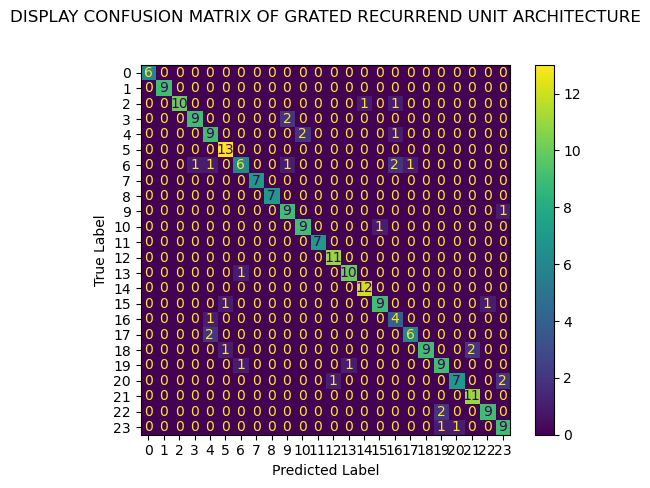

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true_classes, y_pred_classes)

classes = np.arange(cm.shape[0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='viridis', values_format='d')

plt.title('DISPLAY CONFUSION MATRIX OF GRATED RECURREND UNIT ARCHITECTURE\n\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


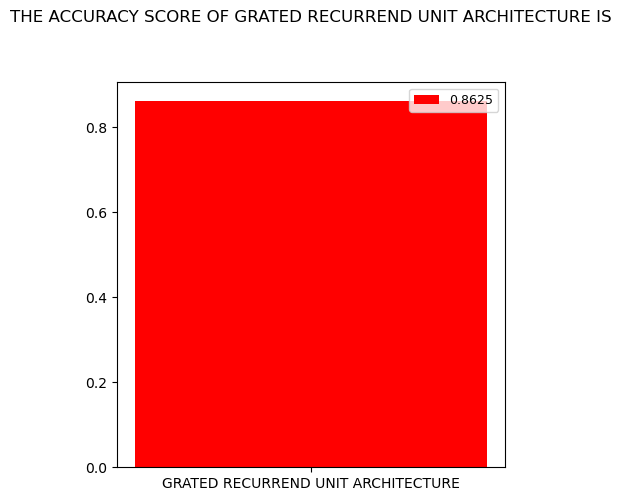

In [28]:
def graph():
    import matplotlib.pyplot as plt
    data=[AC]
    alg="GRATED RECURREND UNIT ARCHITECTURE"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("RED"))
    plt.title("THE ACCURACY SCORE OF GRATED RECURREND UNIT ARCHITECTURE IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()